References:
- https://www.kaggle.com/code/ashishpatel26/gan-beginner-tutorial-for-pytorch-celeba-dataset


### Import packages

In [1]:
import numpy as np
import jax.numpy as jnp
import os
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import CelebA
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

### Hyperparameters

In [2]:
image_size = 80
batch_size_train = 100
batch_size_val = 100
num_workers = 0
shuffle_loader = True
root = 'datasets/'
TARGET_ATTR = 'Eyeglasses' #'Wearing_Hat', 'Bald', 'Bangs', 'Eyeglasses', 'Male', 'No_Beard', 'Smiling', 'Young', 

### Load Dataset & Create dataloader

In [3]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.Grayscale(1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset_train = CelebA(root=root, split='train', transform=transform, target_type='attr', download=False)
dataset_val = CelebA(root=root, split='valid', transform=transform, target_type='attr', download=False)

In [4]:
loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=shuffle_loader, num_workers=num_workers, drop_last=True)
loader_val = DataLoader(dataset=dataset_val, batch_size=batch_size_val, shuffle=False, num_workers=num_workers, drop_last=False)

In [5]:
len(dataset_train), len(dataset_val)

(162770, 19867)

### Example of visualization

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])
torch.Size([100, 1, 80, 80])


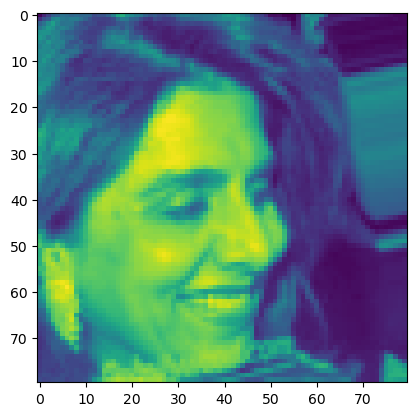

In [6]:
denorm = transforms.Normalize((-1,),(2,))

def im_show(img, ax=None):
    img_denorm = denorm(img)
    img_t = torch.permute(img_denorm, (1,2,0))
    if ax is not None:
        ax.imshow(img_t)
    else:
        plt.imshow(img_t)

img_example, label_example = next(iter(loader_train))

im_show(img_example[0])
print(label_example[0])
print(img_example.shape)

### Run PCA

In [8]:
from fair_streaming_pca import FairStreamingPCA

pca = FairStreamingPCA(TARGET_ATTR)
pca.fit(
    loader=loader_train,
    target_unfair_dim=100,
    target_pca_dim=2000,
    n_iter_unfair=20,
    n_iter_pca=20,
    block_size_unfair=20000,
    block_size_pca=10000,
    constraint='all',
    unfairness_frequent_direction=False,
    verbose=True
)

  0%|          | 0/10 [00:00<?, ?it/s]

UnfairCovEstim(1/10)::   0%|          | 0/200 [00:00<?, ?it/s]

UnfairCovEstim(2/10)::   0%|          | 0/200 [00:00<?, ?it/s]

UnfairCovEstim(3/10)::   0%|          | 0/200 [00:00<?, ?it/s]

UnfairCovEstim(4/10)::   0%|          | 0/200 [00:00<?, ?it/s]

UnfairCovEstim(5/10)::   0%|          | 0/200 [00:00<?, ?it/s]

UnfairCovEstim(6/10)::   0%|          | 0/200 [00:00<?, ?it/s]

UnfairCovEstim(7/10)::   0%|          | 0/200 [00:00<?, ?it/s]

UnfairCovEstim(8/10)::   0%|          | 0/200 [00:00<?, ?it/s]

UnfairCovEstim(9/10)::   0%|          | 0/200 [00:00<?, ?it/s]

UnfairCovEstim(10/10)::   0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

PCA(1/10)::   0%|          | 0/100 [00:00<?, ?it/s]

PCA(2/10)::   0%|          | 0/100 [00:00<?, ?it/s]

PCA(3/10)::   0%|          | 0/100 [00:00<?, ?it/s]

PCA(4/10)::   0%|          | 0/100 [00:00<?, ?it/s]

PCA(5/10)::   0%|          | 0/100 [00:00<?, ?it/s]

PCA(6/10)::   0%|          | 0/100 [00:00<?, ?it/s]

PCA(7/10)::   0%|          | 0/100 [00:00<?, ?it/s]

PCA(8/10)::   0%|          | 0/100 [00:00<?, ?it/s]

PCA(9/10)::   0%|          | 0/100 [00:00<?, ?it/s]

PCA(10/10)::   0%|          | 0/100 [00:00<?, ?it/s]

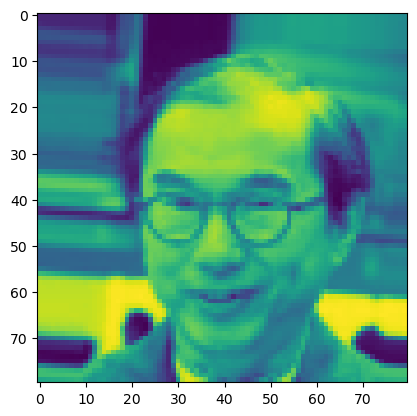

In [38]:
img_example, label_example = next(iter(loader_val))
index = 15
im_show(img_example[index])

In [39]:
projected = pca.transform(img_example[index], lambda_transform=lambda x: torch.Tensor(np.asarray(x)))

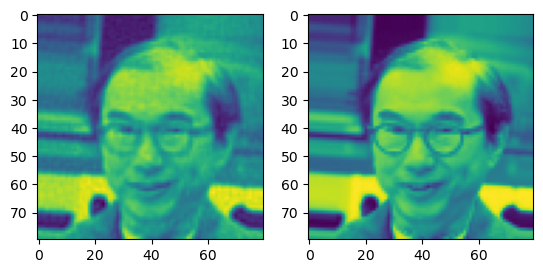

In [40]:
fig, ax = plt.subplots(1,2)
proj_denorm = im_show(projected[0], ax[0])
im_show(img_example[index], ax[1])